IMDB Review classifier

In [6]:
#importiamo database review imdb
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb. load_data(num_words=10000)


word_index = imdb.get_word_index() #dizionario indici-parole 
reverse_word_index = dict(
    [(value, key) for (key,value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]]) #discostamento di 3 per indici riservati

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Modelliamo e compiliamo il modello:

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])



Creiamo un validation set per validare il nostro approccio:

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9974 - loss: 0.0153 - val_accuracy: 0.8696 - val_loss: 0.5828
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9996 - loss: 0.0082 - val_accuracy: 0.8667 - val_loss: 0.6054
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9980 - loss: 0.0122 - val_accuracy: 0.8679 - val_loss: 0.6238
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9984 - loss: 0.0103 - val_accuracy: 0.8688 - val_loss: 0.6482
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9998 - loss: 0.0056 - val_accuracy: 0.8670 - val_loss: 0.6833
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9997 - loss: 0.0052 - val_accuracy: 0.8505 - val_loss: 0.7925
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9997 - loss: 0.0045 - val_accuracy: 0.8666 - val_loss: 0.7140
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9973 - loss: 0.0097 - val_accuracy: 0.8664 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plottiamo training e validation loss:

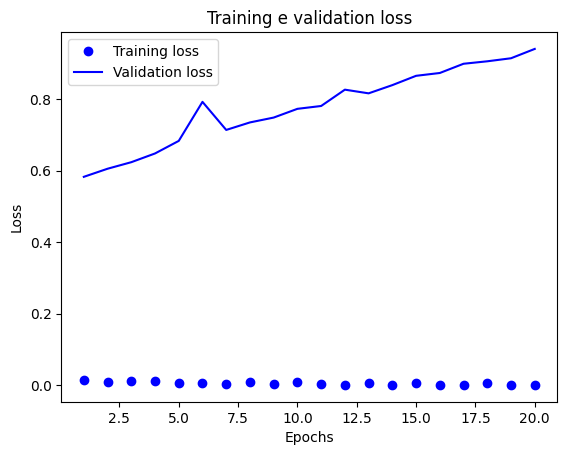

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training e validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

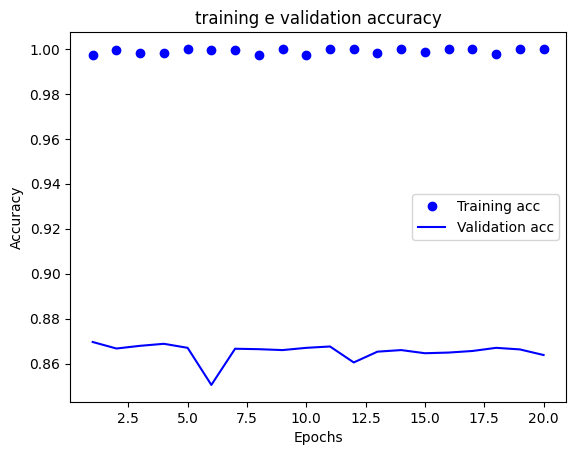

In [12]:
plt.clf() #pulisce
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("training e validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Addestriamo 3 ulteriori modelli, ciascuno con numero di layer e/o numero unità layer, per osservare che:

In [14]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)
print(model.predict(x_test))

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8026 - loss: 0.4981
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8984 - loss: 0.2832
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9239 - loss: 0.2153
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9356 - loss: 0.1813
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8791 - loss: 0.3041
[0.3041207492351532, 0.8790799975395203]
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
[[0.16044168]
 [0.99992865]
 [0.8186939 ]
 ...
 [0.10356877]
 [0.06607817]
 [0.37056768]]


In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)
print(model.predict(x_test))

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.7627 - loss: 0.5438
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8964 - loss: 0.3078
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9230 - loss: 0.2195
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9357 - loss: 0.1816
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8798 - loss: 0.3094
[0.3093624711036682, 0.8797600269317627]
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[[0.11327921]
 [0.9999775 ]
 [0.88676625]
 ...
 [0.12037483]
 [0.07606117]
 [0.48111337]]


In [16]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)
print(model.predict(x_test))

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8034 - loss: 0.4469
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8980 - loss: 0.2644
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9238 - loss: 0.2081
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9302 - loss: 0.1810
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8784 - loss: 0.3066
[0.3065560460090637, 0.8783599734306335]
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
[[0.15960646]
 [0.9995487 ]
 [0.37258267]
 ...
 [0.08368377]
 [0.05447416]
 [0.32302183]]


Fin quando la logica del modello rimane la stessa (relu, relu, sigmoid), i parametri non cambiano di troppo loss e accuracy (cambiamenti microscopici)